In [95]:
# !pip install kaggle
# !pip install pandas

In [96]:
# !kaggle datasets download -d gpreda/covid-world-vaccination-progress


  0%|          | 0.00/160k [00:00<?, ?B/s]
100%|##########| 160k/160k [00:00<00:00, 1.20MB/s]
100%|##########| 160k/160k [00:00<00:00, 1.19MB/s]


In [97]:
import zipfile
with zipfile.ZipFile('covid-world-vaccination-progress.zip', 'r') as zip_ref:
    zip_ref.extractall(".") 

In [108]:
import numpy as np
import pandas as pd
df = pd.read_csv('country_vaccinations.csv')
# podział danych na train/validate/test (6:2:2) za pomocą biblioteki numpy i pandas
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [99]:
# Wypisanie ilości elementów w poszczególnych ramkach danych
print("Whole set size".ljust(20), df.size)
print("Train set size: ".ljust(20), train.size)
print("Validate set size: ".ljust(20), validate.size)
print("Test set size: ".ljust(20), test.size)

Whole set size       110055
Train set size:      66030
Validate set size:   22005
Test set size:       22020


In [100]:
df.describe(include='all')

country iso_code        date  total_vaccinations  people_vaccinated  \
count     7337     7337        7337        4.552000e+03       4.053000e+03   
unique     150      150          97                 NaN                NaN   
top     Canada      GBR  2021-03-09                 NaN                NaN   
freq        96       96         129                 NaN                NaN   
mean       NaN      NaN         NaN        2.361121e+06       1.918598e+06   
std        NaN      NaN         NaN        8.421579e+06       6.249484e+06   
min        NaN      NaN         NaN        0.000000e+00       0.000000e+00   
25%        NaN      NaN         NaN        3.741475e+04       3.457400e+04   
50%        NaN      NaN         NaN        2.536690e+05       2.334230e+05   
75%        NaN      NaN         NaN        1.195748e+06       9.467810e+05   
max        NaN      NaN         NaN        1.183138e+08       7.723006e+07   

        people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
count              2.749000e+03            3.830000e+03        7.150000e+03   
unique                      NaN                     NaN                 NaN   
top                         NaN                     NaN                 NaN   
freq                        NaN                     NaN                 NaN   
mean               7.999520e+05            8.744129e+04        5.825144e+04   
std                3.230805e+06            2.693155e+05        1.992295e+05   
min                1.000000e+00            0.000000e+00        1.000000e+00   
25%                1.799500e+04            2.732000e+03        9.882500e+02   
50%                9.966600e+04            1.365700e+04        5.952500e+03   
75%                4.625030e+05            5.718200e+04        2.680500e+04   
max                4.193463e+07            4.575496e+06        2.541597e+06   

        total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                      4552.000000                    4053.000000   
unique                             NaN                            NaN   
top                                NaN                            NaN   
freq                               NaN                            NaN   
mean                          9.398541                       7.237774   
std                          16.995766                      11.614673   
min                           0.000000                       0.000000   
25%                           0.717500                       0.720000   
50%                           3.465000                       3.050000   
75%                          10.080000                       7.890000   
max                         151.860000                      88.790000   

        people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
count                           2749.000000                     7150.000000   
unique                                  NaN                             NaN   
top                                     NaN                             NaN   
freq                                    NaN                             NaN   
mean                               3.361342                     2675.625594   
std                                7.262965                     4229.243670   
min                                0.000000                        0.000000   
25%                                0.370000                      355.000000   
50%                                1.360000                     1247.000000   
75%                                3.000000                     3026.750000   
max                               63.070000                    54264.000000   

                                            vaccines         source_name  \
count                                           7337                7337   
unique                                            25                  91   
top     Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  Ministry of H


 country
AxesSubplot(0.125,0.125;0.775x0.755)

 iso_code
AxesSubplot(0.125,0.125;0.775x0.755)

 date
AxesSubplot(0.125,0.125;0.775x0.755)

 total_vaccinations
AxesSubplot(0.125,0.125;0.775x0.755)

 people_vaccinated
AxesSubplot(0.125,0.125;0.775x0.755)

 people_fully_vaccinated
AxesSubplot(0.125,0.125;0.775x0.755)

 daily_vaccinations_raw
AxesSubplot(0.125,0.125;0.775x0.755)

 daily_vaccinations
AxesSubplot(0.125,0.125;0.775x0.755)

 total_vaccinations_per_hundred
AxesSubplot(0.125,0.125;0.775x0.755)

 people_vaccinated_per_hundred
AxesSubplot(0.125,0.125;0.775x0.755)

 people_fully_vaccinated_per_hundred
AxesSubplot(0.125,0.125;0.775x0.755)

 daily_vaccinations_per_million
AxesSubplot(0.125,0.125;0.775x0.755)

 vaccines
AxesSubplot(0.125,0.125;0.775x0.755)

 source_name
AxesSubplot(0.125,0.125;0.775x0.755)

 source_website
AxesSubplot(0.125,0.125;0.775x0.755)


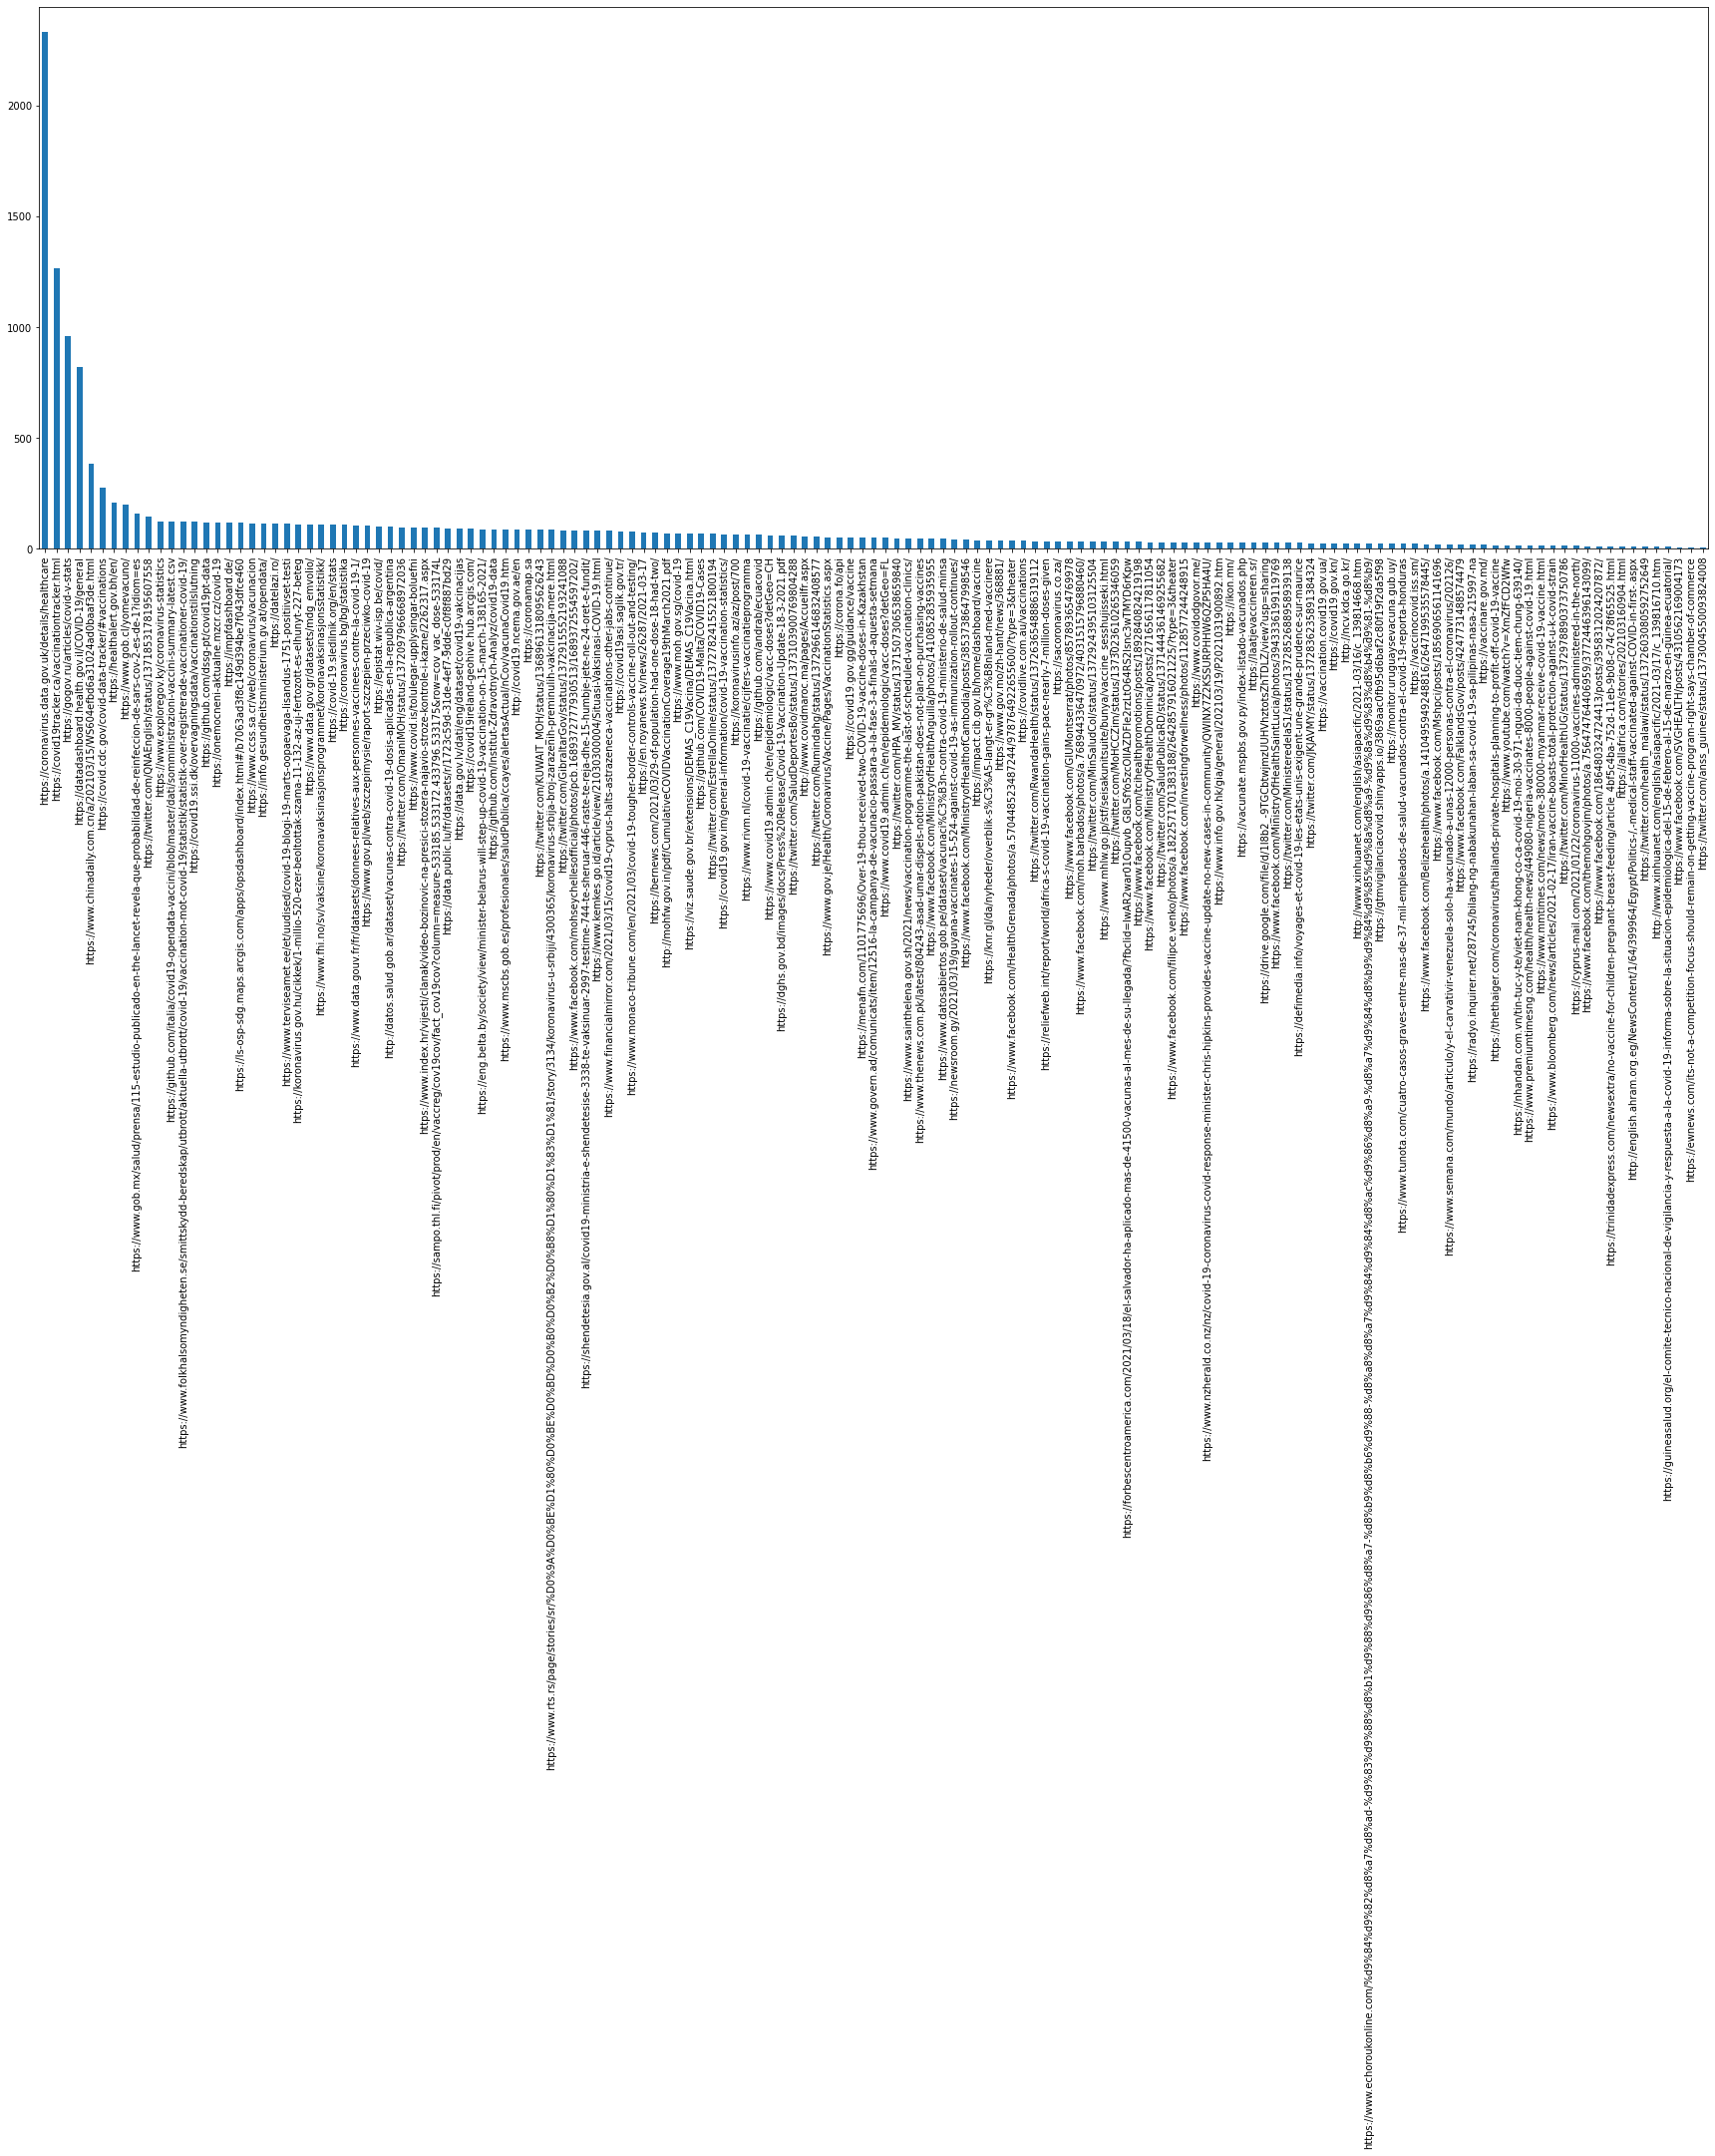

In [101]:
for col in df.columns:
    column = df[col].value_counts().plot(kind="bar",figsize=(30,10))
    print("\n", col)
    print(column)

In [105]:
# !pip install sklearn

In [111]:
from sklearn import preprocessing
# normalizacja wartości numerycznych
numeric_values = df.select_dtypes(include='float64').values # tylko wartości numeryczne
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(values)
numeric_columns = df.select_dtypes(include='float64').columns
df_normalized = pd.DataFrame(x_scaled, columns=numeric_columns)
for col in df.columns: # usunięcie nieznormalizowanych danych i wstawienie nowych już znormalizowanych do oryginalnej ramki danych
    if col in numeric_columns: df[col] = df_normalized[col]

country iso_code        date  total_vaccinations  people_vaccinated  \
0     Afghanistan      AFG  2021-02-22                 0.0                0.0   
1     Afghanistan      AFG  2021-02-23                 NaN                NaN   
2     Afghanistan      AFG  2021-02-24                 NaN                NaN   
3     Afghanistan      AFG  2021-02-25                 NaN                NaN   
4     Afghanistan      AFG  2021-02-26                 NaN                NaN   
...           ...      ...         ...                 ...                ...   
7332     Zimbabwe      ZWE  2021-03-15                 NaN                NaN   
7333     Zimbabwe      ZWE  2021-03-16                 NaN                NaN   
7334     Zimbabwe      ZWE  2021-03-17                 NaN                NaN   
7335     Zimbabwe      ZWE  2021-03-18                 NaN                NaN   
7336     Zimbabwe      ZWE  2021-03-19                 NaN                NaN   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         NaN                     NaN                 NaN   
1                         NaN                     NaN            0.000537   
2                         NaN                     NaN            0.000537   
3                         NaN                     NaN            0.000537   
4                         NaN                     NaN            0.000537   
...                       ...                     ...                 ...   
7332                      NaN                     NaN                 NaN   
7333                      NaN                     NaN                 NaN   
7334                      NaN                     NaN                 NaN   
7335                      NaN                     NaN                 NaN   
7336                      NaN                     NaN                 NaN   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.0                            0.0   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
7332                             NaN                            NaN   
7333                             NaN                            NaN   
7334                             NaN                            NaN   
7335                             NaN                            NaN   
7336                             NaN                            NaN   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                     NaN                             NaN   
1                                     NaN                        0.000645   
2                                     NaN                        0.000645   
3                                     NaN                        0.000645   
4                                     NaN                        0.000645   
...                                   ...                             ...   
7332                                  NaN                             NaN   
7333                                  NaN                             NaN   
7334                                  NaN                             NaN   
7335                                  NaN                             NaN   
7336                                  NaN                             NaN   

                vaccines                source_name  \
0     Oxford/AstraZeneca  Government of Afghanistan   
1     Oxford/AstraZeneca  Government of Afghanistan   
2     Oxford/AstraZeneca  Government of Afghanistan   
3     Oxford/AstraZeneca  Government of Afghanistan   
4     Oxford/AstraZeneca  Government of Afghanistan   
... 

In [112]:
df.dropna() # usunięcie wierszy z polami NaN

country iso_code        date  total_vaccinations  \
46                 Albania      ALB  2021-02-02            0.000027   
234    Antigua and Barbuda      ATG  2021-03-13            0.002351   
235    Antigua and Barbuda      ATG  2021-03-14            0.002474   
236    Antigua and Barbuda      ATG  2021-03-15            0.002548   
237              Argentina      ARG  2020-12-29            0.002583   
...                    ...      ...         ...                 ...   
6965  United Arab Emirates      ARE  2021-03-10            0.011805   
6966  United Arab Emirates      ARE  2021-03-11            0.012128   
6967  United Arab Emirates      ARE  2021-03-12            0.012272   
6968  United Arab Emirates      ARE  2021-03-13            0.012499   
6969  United Arab Emirates      ARE  2021-03-14            0.012796   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
46             0.000033                 0.000015                0.000295   
234            0.003385                 0.000409                0.003888   
235            0.003454                 0.000629                0.003033   
236            0.003514                 0.000730                0.001849   
237            0.003530                 0.000800                0.000865   
...                 ...                      ...                     ...   
6965           0.014719                 0.006252                0.008788   
6966           0.015115                 0.006437                0.007986   
6967           0.015243                 0.006608                0.003560   
6968           0.015473                 0.006826                0.005609   
6969           0.015709                 0.007232                0.007341   

      daily_vaccinations  total_vaccinations_per_hundred  \
46              0.000100                        0.000751   
234             0.004605                        0.004030   
235             0.004431                        0.004235   
236             0.004376                        0.004371   
237             0.004069                        0.004440   
...                  ...                             ...   
6965            0.010273                        0.289051   
6966            0.011229                        0.296974   
6967            0.011531                        0.300526   
6968            0.011996                        0.306058   
6969            0.012412                        0.313367   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
46                         0.000906                             0.000344   
234                        0.006229                             0.000688   
235                        0.006342                             0.001033   
236                        0.006455                             0.001033   
237                        0.006569                             0.001205   
...                             ...                                  ...   
6965                       0.389468                             0.136465   
6966                       0.400000                             0.140423   
6967                       0.403398                             0.144209   
6968                       0.409400                             0.149028   
6969                       0.415629                             0.157804   

      daily_vaccinations_per_million  \
46                          0.001622   
234                         0.004773   
235                         0.004589   
236                         0.004533   
237                         0.004220   
...                              ...   
6965                        0.152606   
6966                        0.166814   
6967                        0.171292   
6968                        0.178221   
6969                        0.184395   

                                               vaccines  \
46                                      Pfizer/BioNTech   
234                 